For working on numerical data, Pandas provide few variants like rolling, expanding and exponentially moving weights for window statistics. Among these are sum, mean, median, variance, covariance, correlation, etc.

We will now learn how each of these can be applied on DataFrame objects.

# .rolling() Function
This function can be applied on a series of data. Specify the window=n argument and apply the appropriate statistical function on top of it.

In [8]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(10,size=(10, 4)),
index = pd.date_range('1/1/2000', periods=10),columns = ['A', 'B', 'C', 'D'])
print("Original Data Frame :\n", df)
df.rolling(window=3).mean()

Original Data Frame :
             A  B  C  D
2000-01-01  7  8  0  5
2000-01-02  2  4  3  3
2000-01-03  6  8  4  8
2000-01-04  3  7  2  7
2000-01-05  2  9  4  7
2000-01-06  3  3  0  5
2000-01-07  2  6  3  9
2000-01-08  2  7  5  1
2000-01-09  7  7  6  3
2000-01-10  9  5  6  4


,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,5.000000,6.666667,2.333333,5.333333
2000-01-04,3.666667,6.333333,3.000000,6.000000
2000-01-05,3.666667,8.000000,3.333333,7.333333
2000-01-06,2.666667,6.333333,2.000000,6.333333
2000-01-07,2.333333,6.000000,2.333333,7.000000
2000-01-08,2.333333,5.333333,2.666667,5.000000
2000-01-09,3.666667,6.666667,4.666667,4.333333
2000-01-10,6.000000,6.333333,5.666667,2.666667


Note − Since the window size is 3, for first two elements there are nulls and from third the value will be the average of the n, n-1 and n-2 elements. Thus we can also apply various functions as mentioned above.

# .expanding() Function
This function can be applied on a series of data. Specify the min_periods=n argument and apply the appropriate statistical function on top of it. 

It calculates the cummulative sum of the columns.

In [16]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"A":[1,2,3,12,45,66],"B":[4,6,8,56,7,8]})
print(df)
list(df.expanding(min_periods=2)) 
print(df.expanding(min_periods=3).mean())

    A   B
0   1   4
1   2   6
2   3   8
3  12  56
4  45   7
5  66   8
      A          B
0   NaN        NaN
1   NaN        NaN
2   2.0   6.000000
3   4.5  18.500000
4  12.6  16.200000
5  21.5  14.833333


# .ewm() Function
ewm is applied on a series of data. Specify any of the com, span, halflife argument and apply the appropriate statistical function on top of it. It assigns the weights exponentially.

In [17]:
import pandas as pd
import numpy as np
 
df = pd.DataFrame({'periods':[1,2,3,4,5,6,7,8,9,10],
                  'Sales':[25,20,14,16,27,20,12,15,14,19]})

print(df)
df['4dayEWM'] = df['Sales'].ewm(span=5,adjust=False).mean()

df

   periods  Sales
0        1     25
1        2     20
2        3     14
3        4     16
4        5     27
5        6     20
6        7     12
7        8     15
8        9     14
9       10     19


,periods,Sales,4dayEWM
0,1,25,25.000000
1,2,20,23.333333
2,3,14,20.222222
3,4,16,18.814815
4,5,27,21.543210
5,6,20,21.028807
6,7,12,18.019204
7,8,15,17.012803
8,9,14,16.008535
9,10,19,17.005690


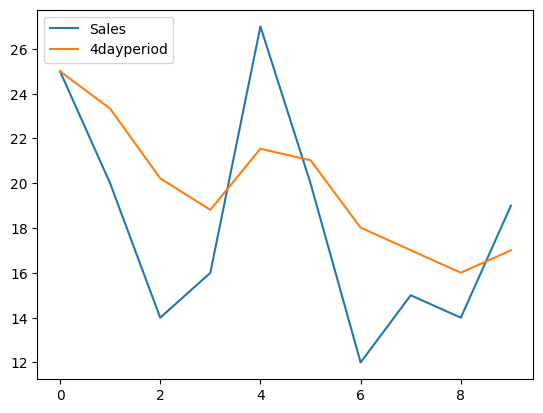

In [18]:
import matplotlib.pyplot as plt

plt.plot(df['Sales'],label='Sales')
plt.plot(df['4dayEWM'],label='4dayperiod')
plt.legend(loc=2)

Window functions are majorly used in finding the trends within the data graphically by smoothing the curve. If there is lot of variation in the everyday data and a lot of data points are available, then taking the samples and plotting is one method and applying the window computations and plotting the graph on the results is another method. By these methods, we can smooth the curve or the trend.